# Hackathon: Shinkansen Travel Experience

## Context

This problem statement is based on the Shinkansen Bullet Train in Japan, and passengers’ experience with that mode of travel. This machine learning exercise aims to determine the relative importance of each parameter with regards to their contribution to the passengers’ overall travel experience. The dataset contains a random sample of individuals who traveled on this train. The on-time performance of the trains along with passenger information is published in a file named ‘Traveldata_train.csv’.  These passengers were later asked to provide their feedback on various parameters related to the travel along with their overall experience. These collected details are made available in the survey report labeled ‘Surveydata_train.csv’.

In the survey, each passenger was explicitly asked whether they were satisfied with their overall travel experience or not, and that is captured in the data of the survey report under the variable labeled ‘Overall_Experience’. 

## Objective

The goal of the problem is to predict whether a passenger was satisfied or not considering his/her overall experience of traveling on the Shinkansen Bullet Train. And to understand which parameters play an important role in swaying passenger feedback towards a positive scale.

## Dataset Description

- **ID** - The unique ID of the passenger 
- **Gender** - The gender of the passenger
- **Customer_Type** - Loyalty type of the passenger
- **Age** - The age of the passenger
- **Type_Travel** - Purpose of travel for the passenger
- **Travel_Class** - The train class that the passenger traveled in
- **Travel_Distance** - The distance traveled by the passenger
- **Departure_Delay_in_Mins** - The delay (in minutes) in train departure
- **Arrival_Delay_in_Mins** - The delay (in minutes) in train arrival

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_travel_train = pd.read_csv('Traveldata_train.csv')
df_survey_train = pd.read_csv('Surveydata_train.csv')
df_travel_test = pd.read_csv('Traveldata_test.csv')
df_survey_test = pd.read_csv('Surveydata_test.csv')

In [3]:
df_travel_train.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [4]:
df_travel_train.tail()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
94374,98894375,Male,Loyal Customer,32.0,Business Travel,Business,1357,83.0,125.0
94375,98894376,Male,Loyal Customer,44.0,Business Travel,Business,592,5.0,11.0
94376,98894377,Male,NaN,63.0,Business Travel,Business,2794,0.0,0.0
94377,98894378,Male,Loyal Customer,16.0,Personal Travel,Eco,2744,0.0,0.0
94378,98894379,Male,Loyal Customer,54.0,NaN,Eco,2107,28.0,28.0


In [5]:
df_survey_train.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [6]:
df_survey_train.tail()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
94374,98894375,0,Poor,Ordinary,Good,Good,Convenient,Poor,Poor,Poor,Poor,Good,Good,Good,Needs Improvement,Good,Poor
94375,98894376,1,Good,Ordinary,Good,Good,Convenient,Needs Improvement,Excellent,Excellent,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Good
94376,98894377,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Acceptable,Good,Acceptable
94377,98894378,0,Needs Improvement,Ordinary,NaN,Needs Improvement,Convenient,Good,Needs Improvement,Good,Good,Acceptable,Good,Good,Good,Excellent,Good
94378,98894379,0,Acceptable,Ordinary,Poor,Acceptable,Manageable,Acceptable,Acceptable,Acceptable,Acceptable,Poor,Good,Good,Poor,Good,Acceptable


In [7]:
df_travel_test.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,99900001,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0
1,99900002,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0
2,99900003,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0
4,99900005,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0


In [8]:
df_travel_test.tail()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
35597,99935598,Male,Loyal Customer,8.0,Personal Travel,Eco,1334,0.0,0.0
35598,99935599,Female,Loyal Customer,53.0,Business Travel,Business,1772,0.0,0.0
35599,99935600,Male,Disloyal Customer,22.0,Business Travel,Eco,1180,0.0,0.0
35600,99935601,Female,Loyal Customer,67.0,Personal Travel,Eco,420,23.0,16.0
35601,99935602,Male,NaN,20.0,Personal Travel,Eco,1680,0.0,0.0


In [9]:
df_survey_test.head()

,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Acceptable,Green Car,Acceptable,Acceptable,Manageable,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,99900002,Extremely Poor,Ordinary,Good,Poor,Manageable,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,99900003,Excellent,Ordinary,Excellent,Excellent,Very Convenient,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,99900004,Acceptable,Green Car,Excellent,Acceptable,Very Convenient,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,99900005,Excellent,Ordinary,Extremely Poor,Excellent,Needs Improvement,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent


In [10]:
df_survey_test.tail()

,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
35597,99935598,Needs Improvement,Green Car,Excellent,Needs Improvement,Manageable,Acceptable,Needs Improvement,Acceptable,Acceptable,Good,Excellent,Good,Acceptable,Good,Acceptable
35598,99935599,Needs Improvement,Ordinary,Needs Improvement,Good,Needs Improvement,Acceptable,Excellent,Excellent,Good,Good,Good,Good,Acceptable,Good,Good
35599,99935600,Good,Green Car,Extremely Poor,Good,Needs Improvement,Needs Improvement,Good,Poor,Needs Improvement,Poor,Acceptable,Poor,Poor,Excellent,Needs Improvement
35600,99935601,Excellent,Ordinary,Excellent,Excellent,Inconvenient,Acceptable,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Acceptable,Excellent,Good
35601,99935602,Good,Ordinary,Acceptable,Good,Manageable,Poor,Good,Poor,Poor,Acceptable,Good,Good,Needs Improvement,Good,Poor


In [11]:
df_travel_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


In [12]:
df_travel_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Gender                   35572 non-null  object 
 2   Customer_Type            32219 non-null  object 
 3   Age                      35591 non-null  float64
 4   Type_Travel              32154 non-null  object 
 5   Travel_Class             35602 non-null  object 
 6   Travel_Distance          35602 non-null  int64  
 7   Departure_Delay_in_Mins  35573 non-null  float64
 8   Arrival_Delay_in_Mins    35479 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.4+ MB


In [13]:
df_survey_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

In [14]:
df_survey_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       35602 non-null  int64 
 1   Seat_Comfort             35580 non-null  object
 2   Seat_Class               35602 non-null  object
 3   Arrival_Time_Convenient  32277 non-null  object
 4   Catering                 32245 non-null  object
 5   Platform_Location        35590 non-null  object
 6   Onboard_Wifi_Service     35590 non-null  object
 7   Onboard_Entertainment    35594 non-null  object
 8   Online_Support           35576 non-null  object
 9   Ease_of_Online_Booking   35584 non-null  object
 10  Onboard_Service          32730 non-null  object
 11  Legroom                  35577 non-null  object
 12  Baggage_Handling         35562 non-null  object
 13  CheckIn_Service          35580 non-null  object
 14  Cleanliness              35600 non-nul

In [15]:
df_travel_train.nunique()

ID                         94379
Gender                         2
Customer_Type                  2
Age                           75
Type_Travel                    2
Travel_Class                   2
Travel_Distance             5210
Departure_Delay_in_Mins      437
Arrival_Delay_in_Mins        434
dtype: int64

In [16]:
df_survey_train.nunique()

ID                         94379
Overall_Experience             2
Seat_Comfort                   6
Seat_Class                     2
Arrival_Time_Convenient        6
Catering                       6
Platform_Location              6
Onboard_Wifi_Service           6
Onboard_Entertainment          6
Online_Support                 6
Ease_of_Online_Booking         6
Onboard_Service                6
Legroom                        6
Baggage_Handling               5
CheckIn_Service                6
Cleanliness                    6
Online_Boarding                6
dtype: int64

In [17]:
df_travel_test.nunique()

ID                         35602
Gender                         2
Customer_Type                  2
Age                           75
Type_Travel                    2
Travel_Class                   2
Travel_Distance             4644
Departure_Delay_in_Mins      350
Arrival_Delay_in_Mins        355
dtype: int64

In [18]:
df_survey_test.nunique()

ID                         35602
Seat_Comfort                   6
Seat_Class                     2
Arrival_Time_Convenient        6
Catering                       6
Platform_Location              5
Onboard_Wifi_Service           6
Onboard_Entertainment          6
Online_Support                 5
Ease_of_Online_Booking         6
Onboard_Service                5
Legroom                        6
Baggage_Handling               5
CheckIn_Service                5
Cleanliness                    5
Online_Boarding                6
dtype: int64

In [19]:
df_train = pd.merge(df_travel_train, df_survey_train, how='left', on ='ID')
df_train = df_train.set_index('ID')
df_train.shape

(94379, 24)

In [20]:
df_test = pd.merge(df_travel_test, df_survey_test, how = 'left', on ='ID')
df_test = df_test.set_index('ID')
df_test.shape

(35602, 23)

In [21]:
df_train.head()

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
ID,,,,,,,,,,,,,,,,,,,,,
98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,Needs Improvement,...,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,Poor,...,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,Needs Improvement,...,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,Acceptable,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,Acceptable,...,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [22]:
df_train.tail()

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
ID,,,,,,,,,,,,,,,,,,,,,
98894375,Male,Loyal Customer,32.0,Business Travel,Business,1357,83.0,125.0,0,Poor,...,Poor,Poor,Poor,Poor,Good,Good,Good,Needs Improvement,Good,Poor
98894376,Male,Loyal Customer,44.0,Business Travel,Business,592,5.0,11.0,1,Good,...,Needs Improvement,Excellent,Excellent,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Good
98894377,Male,NaN,63.0,Business Travel,Business,2794,0.0,0.0,1,Needs Improvement,...,Good,Excellent,Good,Good,Good,Good,Good,Acceptable,Good,Acceptable
98894378,Male,Loyal Customer,16.0,Personal Travel,Eco,2744,0.0,0.0,0,Needs Improvement,...,Good,Needs Improvement,Good,Good,Acceptable,Good,Good,Good,Excellent,Good
98894379,Male,Loyal Customer,54.0,NaN,Eco,2107,28.0,28.0,0,Acceptable,...,Acceptable,Acceptable,Acceptable,Acceptable,Poor,Good,Good,Poor,Good,Acceptable


In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 98800001 to 98894379
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   94302 non-null  object 
 1   Customer_Type            85428 non-null  object 
 2   Age                      94346 non-null  float64
 3   Type_Travel              85153 non-null  object 
 4   Travel_Class             94379 non-null  object 
 5   Travel_Distance          94379 non-null  int64  
 6   Departure_Delay_in_Mins  94322 non-null  float64
 7   Arrival_Delay_in_Mins    94022 non-null  float64
 8   Overall_Experience       94379 non-null  int64  
 9   Seat_Comfort             94318 non-null  object 
 10  Seat_Class               94379 non-null  object 
 11  Arrival_Time_Convenient  85449 non-null  object 
 12  Catering                 85638 non-null  object 
 13  Platform_Location        94349 non-null  object 
 14  Onboard_Wifi

In [24]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,94346.0,39.419647,15.116632,7.0,27.0,40.0,51.0,85.0
Travel_Distance,94379.0,1978.888185,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
Departure_Delay_in_Mins,94322.0,14.647092,38.138781,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,94022.0,15.005222,38.439409,0.0,0.0,0.0,13.0,1584.0
Overall_Experience,94379.0,0.546658,0.497821,0.0,0.0,1.0,1.0,1.0


In [25]:
df_train.Departure_Delay_in_Mins.fillna(df_train.Arrival_Delay_in_Mins, inplace=True)
df_train.Arrival_Delay_in_Mins.fillna(df_train.Departure_Delay_in_Mins, inplace=True)

In [26]:
df_train = df_train.dropna( how='any', subset=['Gender', 'Age', 'Departure_Delay_in_Mins',
                                               'Arrival_Delay_in_Mins', 'Seat_Comfort', 'Platform_Location',
                                               'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
                                               'Ease_of_Online_Booking', 'Legroom', 'Baggage_Handling',
                                               'CheckIn_Service', 'Cleanliness', 'Online_Boarding'])

In [27]:
target = ['Overall_Experience']

In [28]:
num_col = ['Age', 'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']

In [29]:
all_col = list(df_train.columns)
all_col

['Gender',
 'Customer_Type',
 'Age',
 'Type_Travel',
 'Travel_Class',
 'Travel_Distance',
 'Departure_Delay_in_Mins',
 'Arrival_Delay_in_Mins',
 'Overall_Experience',
 'Seat_Comfort',
 'Seat_Class',
 'Arrival_Time_Convenient',
 'Catering',
 'Platform_Location',
 'Onboard_Wifi_Service',
 'Onboard_Entertainment',
 'Online_Support',
 'Ease_of_Online_Booking',
 'Onboard_Service',
 'Legroom',
 'Baggage_Handling',
 'CheckIn_Service',
 'Cleanliness',
 'Online_Boarding']

In [30]:
cat_col = [x for x in all_col if x not in num_col]
cat_col = [x for x in cat_col if x not in target]
cat_col

['Gender',
 'Customer_Type',
 'Type_Travel',
 'Travel_Class',
 'Seat_Comfort',
 'Seat_Class',
 'Arrival_Time_Convenient',
 'Catering',
 'Platform_Location',
 'Onboard_Wifi_Service',
 'Onboard_Entertainment',
 'Online_Support',
 'Ease_of_Online_Booking',
 'Onboard_Service',
 'Legroom',
 'Baggage_Handling',
 'CheckIn_Service',
 'Cleanliness',
 'Online_Boarding']

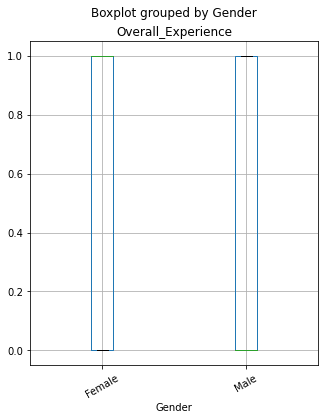

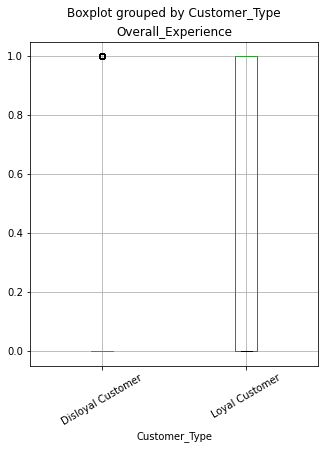

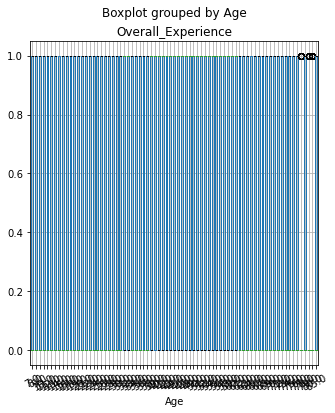

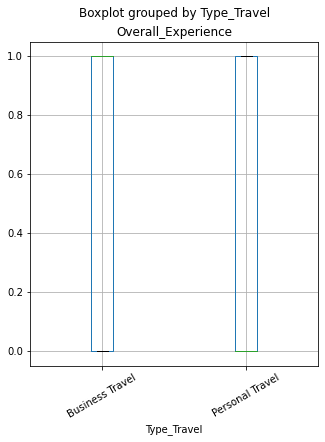

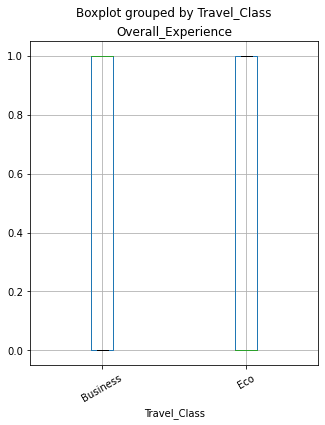

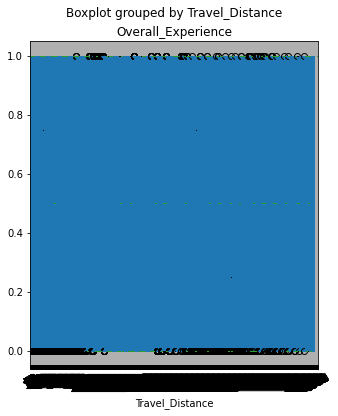

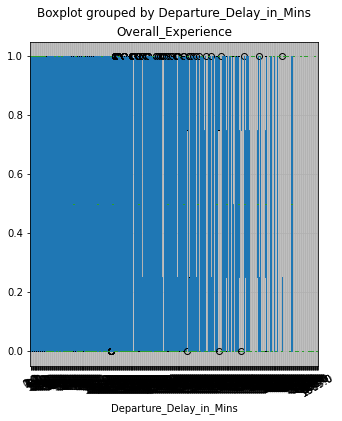

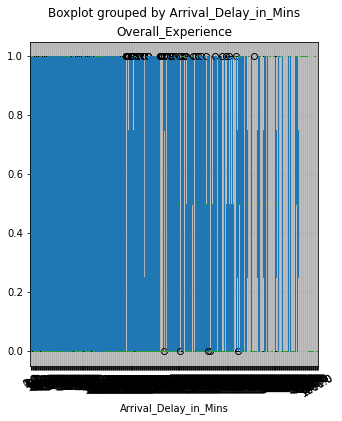

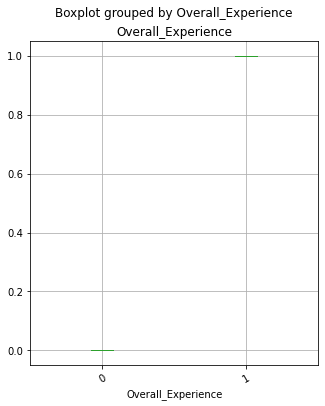

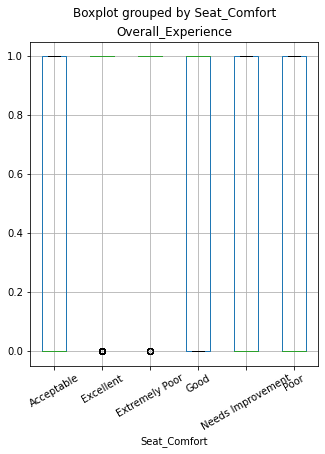

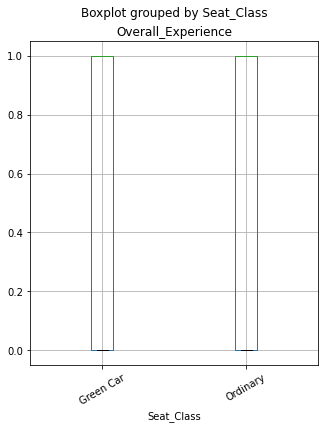

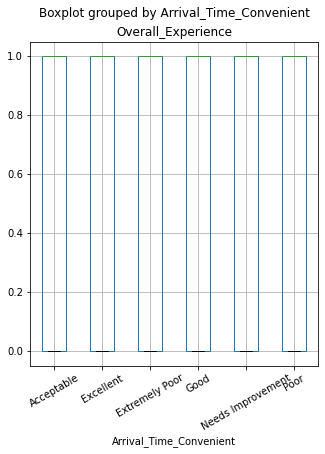

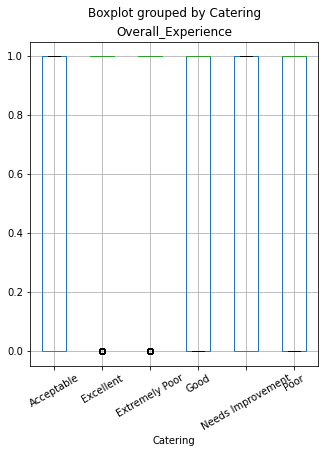

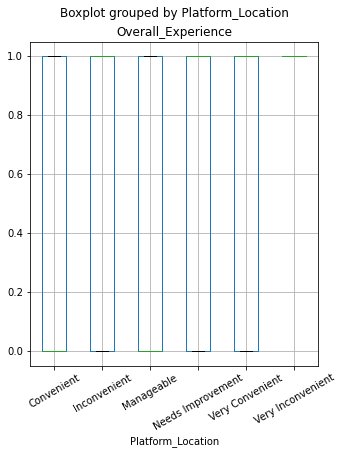

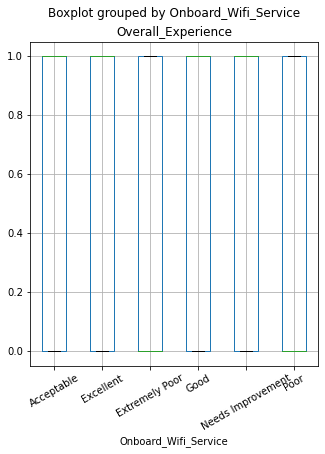

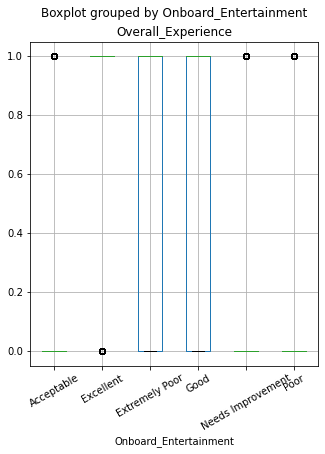

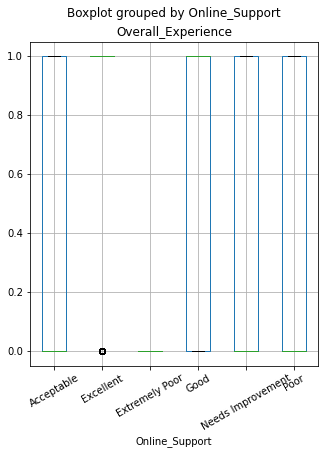

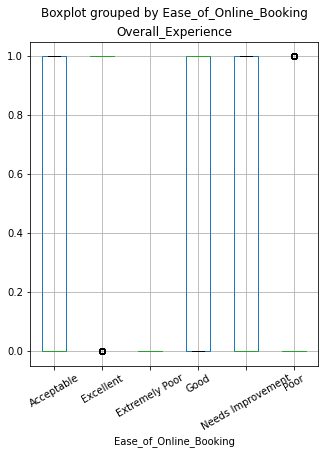

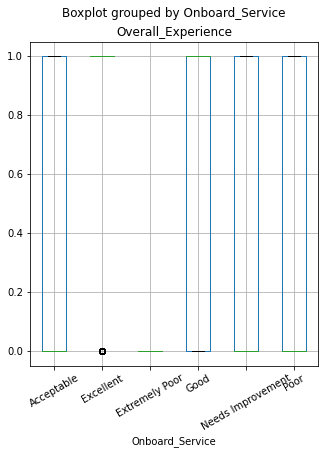

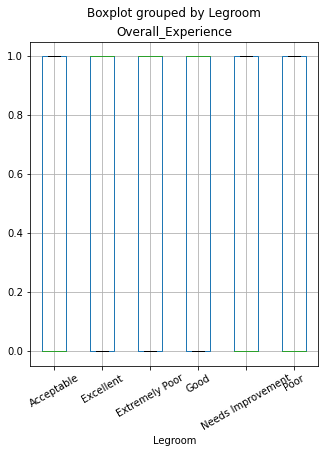

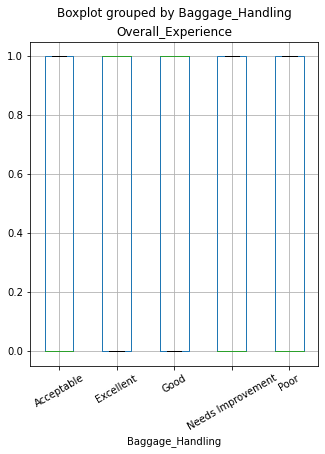

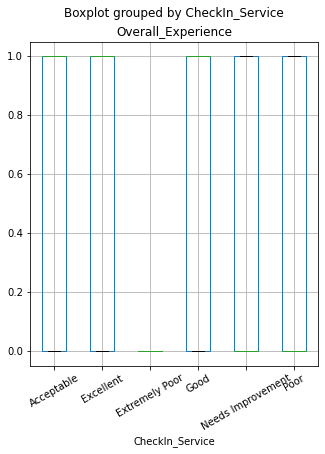

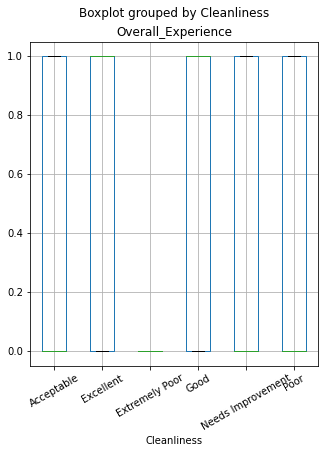

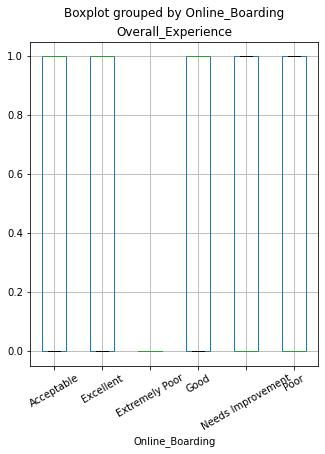

In [31]:
for i in all_col:
    df_train.boxplot('Overall_Experience', i ,rot = 30,figsize=(5,6))

Age
Skew : -0.0


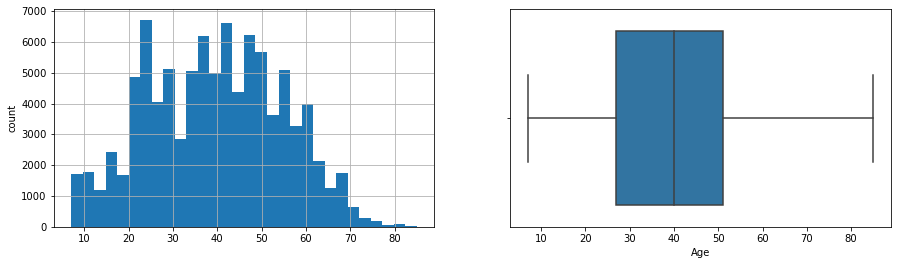

Travel_Distance
Skew : 0.47


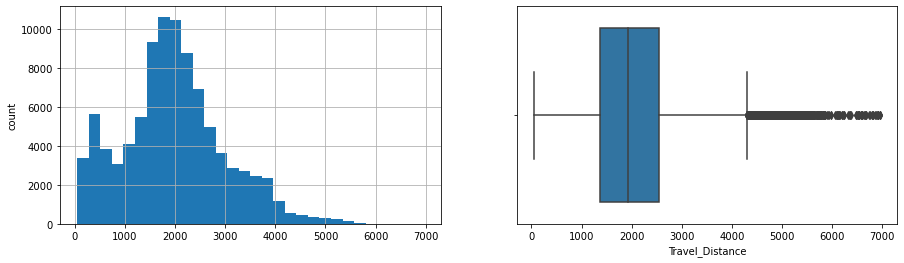

Departure_Delay_in_Mins
Skew : 6.41


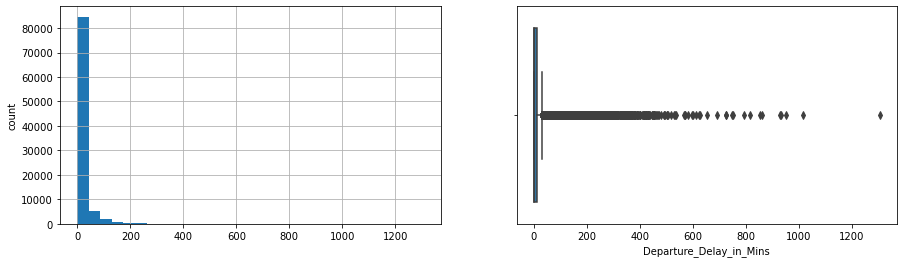

Arrival_Delay_in_Mins
Skew : 6.24


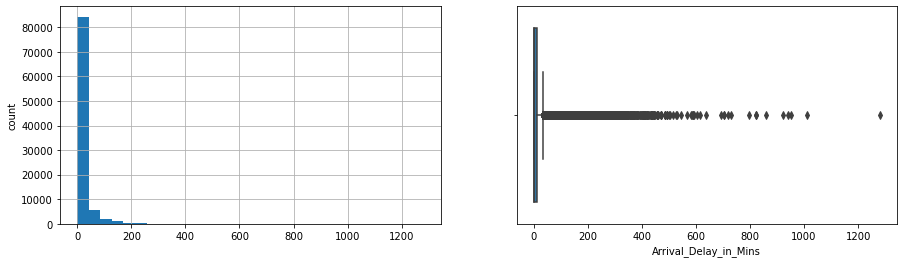

In [32]:
data = df_train

for col in num_col:   #list(df_train.columns):
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=30)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=col, data = data)
    plt.show()

In [33]:
print(df_train.shape)

from numpy import mean
from numpy import std

for i in num_col:
    print("i==",i)
    data = df_train[i]
    data_mean, data_std = mean(data), std(data)
    print("Mean, Std:",data_mean, data_std)
    # identify outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print("Lower, Upper:", lower, upper)
    # identify outliers
    outliers = [x for x in data if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))
    # remove outliers
    df_train.drop(df_train[df_train[i] >= upper].index, inplace = True)
    #outliers_removed = [x for x in data if x >= lower and x <= upper]
    #print('Non-outlier observations: %d' % len(outliers_removed))



#df_train.drop(df_train[df_train['Departure_Delay_in_Mins'] >= 950].index, inplace = True)
#df_train.drop(df_train[df_train['Travel_Distance'] >= 6900].index, inplace = True)
#print(df_train[df_train['Departure_Delay_in_Mins'] >= 970].index)


print(df_train.shape)

(93995, 24)
i== Age
Mean, Std: 39.41930953774137 15.117624442600505
Lower, Upper: -5.933563790060148 84.77218286554289
Identified outliers: 18
i== Travel_Distance
Mean, Std: 1978.7277312533918 1027.9997131741425
Lower, Upper: -1105.2714082690356 5062.726870775819
Identified outliers: 618
i== Departure_Delay_in_Mins
Mean, Std: 14.370633789993466 36.877085616177375
Lower, Upper: -96.26062305853867 125.0018906385256
Identified outliers: 1942
i== Arrival_Delay_in_Mins
Mean, Std: 10.857291313431856 22.000458489232507
Lower, Upper: -55.14408415426567 76.85866678112939
Identified outliers: 2778
(88639, 24)


In [34]:
y = df_train[target]
df_train = df_train.drop(["Overall_Experience"], axis=1)

In [35]:
ind_train = df_train.index
ind_test = df_test.index

df = pd.concat([df_train,df_test], axis=0)
df.tail()

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Seat_Class,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
ID,,,,,,,,,,,,,,,,,,,,,
99935598,Male,Loyal Customer,8.0,Personal Travel,Eco,1334,0.0,0.0,Needs Improvement,Green Car,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Good,Excellent,Good,Acceptable,Good,Acceptable
99935599,Female,Loyal Customer,53.0,Business Travel,Business,1772,0.0,0.0,Needs Improvement,Ordinary,...,Acceptable,Excellent,Excellent,Good,Good,Good,Good,Acceptable,Good,Good
99935600,Male,Disloyal Customer,22.0,Business Travel,Eco,1180,0.0,0.0,Good,Green Car,...,Needs Improvement,Good,Poor,Needs Improvement,Poor,Acceptable,Poor,Poor,Excellent,Needs Improvement
99935601,Female,Loyal Customer,67.0,Personal Travel,Eco,420,23.0,16.0,Excellent,Ordinary,...,Acceptable,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Acceptable,Excellent,Good
99935602,Male,NaN,20.0,Personal Travel,Eco,1680,0.0,0.0,Good,Ordinary,...,Poor,Good,Poor,Poor,Acceptable,Good,Good,Needs Improvement,Good,Poor


In [36]:
df.Departure_Delay_in_Mins.fillna(df.Arrival_Delay_in_Mins, inplace=True)
df.Arrival_Delay_in_Mins.fillna(df.Departure_Delay_in_Mins, inplace=True)

In [37]:
df = df.replace(['Excellent', 'Good', 'Acceptable', 'Needs Improvement', 'Poor', 'Extremely Poor'], 
           [6, 5, 4, 3, 2, 1])
df = df.replace(['Male', 'Female'], [1,0])
df = df.replace(['Loyal Customer', 'Disloyal Customer'], [1,0])
df = df.replace(['Business Travel', 'Personal Travel'], [1,0])
df = df.replace(['Business', 'Eco'], [1,0])
df = df.replace(['Green Car', 'Ordinary'], [1,0])
df = df.replace(['Very Convenient', 'Convenient', 'Manageable', 'Needs Improvement', 'Inconvenient', 'Very Inconvenient'], 
           [6, 5, 4, 3, 2, 1])

In [38]:
df.head()

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Seat_Class,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
ID,,,,,,,,,,,,,,,,,,,,,
98800001,0.0,1.0,52.0,NaN,1,272,0.0,5.0,3.0,1,...,5.0,3.0,4.0,3.0,3.0,4.0,3.0,5.0,3.0,2.0
98800002,1.0,1.0,48.0,0.0,0,2200,9.0,0.0,2.0,0,...,5.0,2.0,5.0,5.0,6.0,3.0,2.0,3.0,5.0,5.0
98800004,0.0,1.0,44.0,1.0,1,780,13.0,18.0,4.0,0,...,4.0,3.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0
98800005,0.0,1.0,50.0,1.0,1,1981,0.0,0.0,4.0,0,...,3.0,5.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
98800006,1.0,1.0,44.0,1.0,1,2810,0.0,0.0,3.0,0,...,5.0,6.0,5.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124241 entries, 98800001 to 99935602
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Gender                   124211 non-null  float64
 1   Customer_Type            112522 non-null  float64
 2   Age                      124230 non-null  float64
 3   Type_Travel              112110 non-null  float64
 4   Travel_Class             124241 non-null  int64  
 5   Travel_Distance          124241 non-null  int64  
 6   Departure_Delay_in_Mins  124212 non-null  float64
 7   Arrival_Delay_in_Mins    124212 non-null  float64
 8   Seat_Comfort             124219 non-null  float64
 9   Seat_Class               124241 non-null  int64  
 10  Arrival_Time_Convenient  112603 non-null  float64
 11  Catering                 112660 non-null  float64
 12  Platform_Location        124229 non-null  float64
 13  Onboard_Wifi_Service     124229 non-null  float64


In [40]:
df19 = df
missing_columns = [col for col in df19.columns if df19[col].isnull().any()]
missig_values_count = df19.isna().sum()
missing_Values_df = pd.DataFrame(missig_values_count.rename("Null Values Count").loc[missig_values_count.ne(0)])
missing_Values_df['Share of Missing Values'] = missing_Values_df["Null Values Count"]/len(df19)
missing_Values_df.style.background_gradient(cmap='Pastel1')

,Null Values Count,Share of Missing Values
Gender,30,0.000241
Customer_Type,11719,0.094325
Age,11,0.000089
Type_Travel,12131,0.097641
Departure_Delay_in_Mins,29,0.000233
Arrival_Delay_in_Mins,29,0.000233
Seat_Comfort,22,0.000177
Arrival_Time_Convenient,11638,0.093673
Catering,11581,0.093214
Platform_Location,12,0.000097


In [41]:
for col in df.columns:
    print(df[col].value_counts(normalize=True))  #The parameter normalize=True gives the percentage of each category
    print('*'*40) 

0.0    0.507532
1.0    0.492468
Name: Gender, dtype: float64
****************************************
1.0    0.817191
0.0    0.182809
Name: Customer_Type, dtype: float64
****************************************
39.0    0.028520
25.0    0.026805
40.0    0.024833
41.0    0.023915
44.0    0.023907
          ...   
76.0    0.000475
74.0    0.000443
79.0    0.000394
78.0    0.000338
85.0    0.000056
Name: Age, Length: 75, dtype: float64
****************************************
1.0    0.688583
0.0    0.311417
Name: Type_Travel, dtype: float64
****************************************
0    0.522509
1    0.477491
Name: Travel_Class, dtype: float64
****************************************
1963    0.000708
1812    0.000700
1789    0.000668
1639    0.000660
1748    0.000660
          ...   
5034    0.000008
5468    0.000008
4903    0.000008
5356    0.000008
5090    0.000008
Name: Travel_Distance, Length: 5057, dtype: float64
****************************************
0.0      0.586948
1.0      0.029

In [42]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
imputer.fit(df)
arr = imputer.transform(df)

In [43]:
df = pd.DataFrame(arr, columns = df.columns, index = df.index)

In [44]:
df

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Seat_Class,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
ID,,,,,,,,,,,,,,,,,,,,,
98800001,0.0,1.000000,52.0,0.333333,1.0,272.0,0.0,5.0,3.0,1.0,...,5.0,3.0,4.0,3.0,3.0,4.0,3.0,5.0,3.0,2.0
98800002,1.0,1.000000,48.0,0.000000,0.0,2200.0,9.0,0.0,2.0,0.0,...,5.0,2.0,5.0,5.0,6.0,3.0,2.0,3.0,5.0,5.0
98800004,0.0,1.000000,44.0,1.000000,1.0,780.0,13.0,18.0,4.0,0.0,...,4.0,3.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0
98800005,0.0,1.000000,50.0,1.000000,1.0,1981.0,0.0,0.0,4.0,0.0,...,3.0,5.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
98800006,1.0,1.000000,44.0,1.000000,1.0,2810.0,0.0,0.0,3.0,0.0,...,5.0,6.0,5.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99935598,1.0,1.000000,8.0,0.000000,0.0,1334.0,0.0,0.0,3.0,1.0,...,4.0,3.0,4.0,4.0,5.0,6.0,5.0,4.0,5.0,4.0
99935599,0.0,1.000000,53.0,1.000000,1.0,1772.0,0.0,0.0,3.0,0.0,...,4.0,6.0,6.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0
99935600,1.0,0.000000,22.0,1.000000,0.0,1180.0,0.0,0.0,5.0,1.0,...,3.0,5.0,2.0,3.0,2.0,4.0,2.0,2.0,6.0,3.0


In [45]:
df19 = df
missing_columns = [col for col in df19.columns if df19[col].isnull().any()]
missig_values_count = df19.isna().sum()
missing_Values_df = pd.DataFrame(missig_values_count.rename("Null Values Count").loc[missig_values_count.ne(0)])
missing_Values_df['Share of Missing Values'] = missing_Values_df["Null Values Count"]/len(df19)
missing_Values_df.style.background_gradient(cmap='Pastel1')

,Null Values Count,Share of Missing Values


In [46]:
for col in df.columns:
    print(df[col].value_counts(normalize=True))  #The parameter normalize=True gives the percentage of each category
    print('*'*40) 

0.000000    0.507441
1.000000    0.492382
0.333333    0.000105
0.666667    0.000072
Name: Gender, dtype: float64
****************************************
1.000000    0.799406
0.000000    0.168978
0.666667    0.020943
0.333333    0.010673
Name: Customer_Type, dtype: float64
****************************************
39.000000    0.028517
25.000000    0.026811
40.000000    0.024831
44.000000    0.023913
41.000000    0.023913
               ...   
39.333333    0.000008
20.333333    0.000008
47.333333    0.000008
51.333333    0.000008
40.666667    0.000008
Name: Age, Length: 81, dtype: float64
****************************************
1.000000    0.662012
0.000000    0.287425
0.666667    0.033837
0.333333    0.016726
Name: Type_Travel, dtype: float64
****************************************
0.0    0.522509
1.0    0.477491
Name: Travel_Class, dtype: float64
****************************************
1963.0    0.000708
1812.0    0.000700
1789.0    0.000668
1639.0    0.000660
1748.0    0.000660
  

In [47]:
df = df.round(decimals = 0)
df = df.astype(int)

In [48]:
df.head()

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Seat_Class,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
ID,,,,,,,,,,,,,,,,,,,,,
98800001,0,1,52,0,1,272,0,5,3,1,...,5,3,4,3,3,4,3,5,3,2
98800002,1,1,48,0,0,2200,9,0,2,0,...,5,2,5,5,6,3,2,3,5,5
98800004,0,1,44,1,1,780,13,18,4,0,...,4,3,4,4,4,4,4,5,4,4
98800005,0,1,50,1,1,1981,0,0,4,0,...,3,5,6,5,5,5,5,5,5,5
98800006,1,1,44,1,1,2810,0,0,3,0,...,5,6,5,4,4,5,4,4,4,4


In [49]:
df = df.drop(['Departure_Delay_in_Mins'], axis=1)

In [50]:
df.head()

,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Arrival_Delay_in_Mins,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
ID,,,,,,,,,,,,,,,,,,,,,
98800001,0,1,52,0,1,272,5,3,1,6,...,5,3,4,3,3,4,3,5,3,2
98800002,1,1,48,0,0,2200,0,2,0,6,...,5,2,5,5,6,3,2,3,5,5
98800004,0,1,44,1,1,780,18,4,0,3,...,4,3,4,4,4,4,4,5,4,4
98800005,0,1,50,1,1,1981,0,4,0,4,...,3,5,6,5,5,5,5,5,5,5
98800006,1,1,44,1,1,2810,0,3,0,3,...,5,6,5,4,4,5,4,4,4,4


<AxesSubplot:>

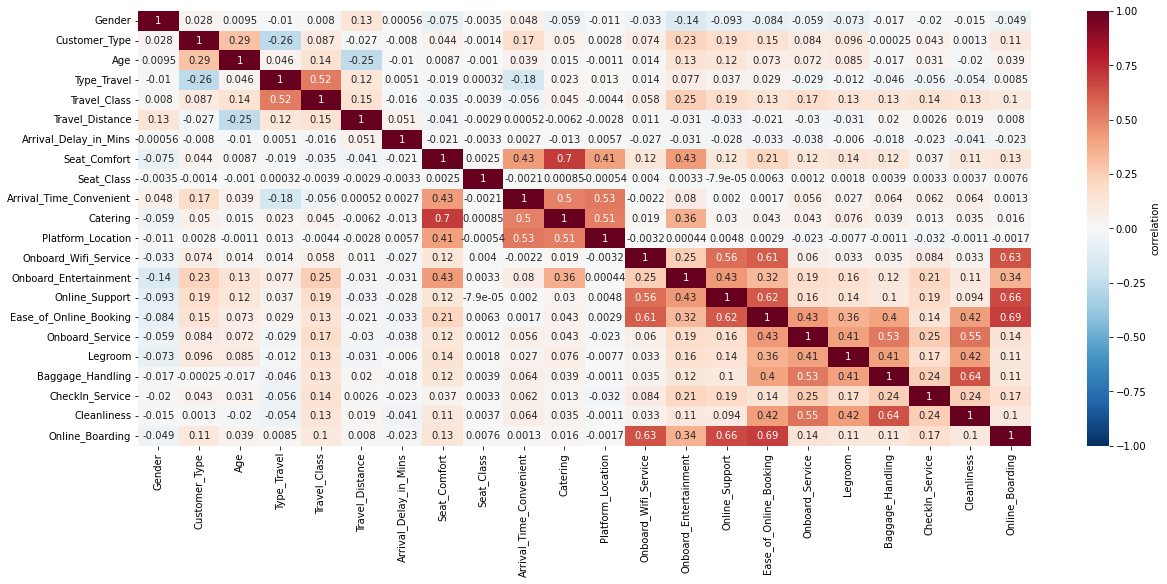

In [51]:
df_corr = df.corr()

# Plot correlations as a heatmap

fig, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(df_corr, vmin=-1, vmax=1, cmap = 'RdBu_r', 
xticklabels=True, yticklabels=True, annot = True, cbar_kws={'label' : 'correlation'}, ax=ax) 

In [52]:
X = df.loc[ind_train]
X_test = df.loc[ind_test]

In [53]:
y=y.astype('int')

# summarize the dataset
print(X.shape, y.shape)
print(type(X),type(y))

(88639, 22) (88639, 1)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [54]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# define dataset

# define the model
rand_forest_classifier_cv = RandomForestClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(rand_forest_classifier_cv, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/Users/zhanna.sakayeva/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/zhanna.sakayeva/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/zhanna.sakayeva/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/zhanna.sakayeva/opt/anaconda3/lib/python3.9/site-packages

Accuracy: 0.952 (0.002)


In [55]:
rand_forest_classifier_cv.fit(X, y)

RandomForestClassifier()

In [56]:
X_test.shape

(35602, 22)

In [57]:
model = rand_forest_classifier_cv

In [58]:
sub = pd.DataFrame(X_test)

res = model.predict(X_test)

sub["Overall_Experience"] = res #res = model.predict(df_test)
sub_to_file = sub[["Overall_Experience"]]
sub_to_file.to_csv("rf_cl_cv_Day2_feature_eng.csv", index = True)
sub_to_file

,Overall_Experience
ID,
99900001,1
99900002,1
99900003,1
99900004,0
99900005,1
...,...
99935598,0
99935599,1
99935600,1


In [65]:
rf = RandomForestClassifier(n_estimators=230, max_depth= 20, max_features= 15, random_state = 100)
rf.fit(X , y)
y_predict = rf.predict(X)
display(accuracy_score(Y_train, y))

y_predict_test = rf.predict(X_test)
display(accuracy_score(Y_test, y_predict_test))

NameError: name 'Y_train' is not defined

In [ ]:
rf_estimator_tuned = RandomForestClassifier(random_state=42)

In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


In [64]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score, accuracy_score

In [ ]:
scorer = metrics.make_scorer(accuracy_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, param_grid, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X, y)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_